Code for Multiple Linear Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
from sklearn import metrics

In [ ]:
data = pd.read_csv("Shunyi-data_norm-py.csv")

In [ ]:
data.head()

,Unnamed: 0,date,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,year,month
0,0,2013-03-01,0,0.001065,0.004012,0.011371,0.023438,0.020202,0.124568,0.277003,0.689781,0.244094,0.0,0.726562,2013.0,Mar
1,1,2013-03-01,1,0.010650,0.010030,0.011371,0.019531,0.020202,0.133102,0.273519,0.695255,0.231496,0.0,0.734375,2013.0,Mar
2,2,2013-03-01,2,0.012780,0.012036,0.011371,0.019531,0.010101,0.061979,0.263066,0.697080,0.204724,0.0,0.671875,2013.0,Mar
3,3,2013-03-01,3,0.010650,0.010030,0.011371,0.011719,0.010101,0.061979,0.256098,0.717153,0.200000,0.0,0.515625,2013.0,Mar
4,4,2013-03-01,4,0.010650,0.010030,0.011371,0.011719,0.010101,0.030685,0.250871,0.724453,0.206299,0.0,0.351562,2013.0,Mar


In [ ]:
#setting the independent and dependent variables
x = data[['PM10','SO2', 'NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']]
y = data['PM25']

In [ ]:
#use training and test sets found in initial analysis
#Splitting according to the above description
xtrain1, xtest1 = data.iloc[:2922,4:14 ], data.iloc[2922:5844, 4:14]
xtrain2, xtest2 = data.iloc[:5844,4:14 ], data.iloc[5844:8766,4:14 ]
xtrain3, xtest3 = data.iloc[:8766,4:14 ], data.iloc[8766:11688,4:14 ]
xtrain4, xtest4 = data.iloc[:11688,4:14 ], data.iloc[11688:14610,4:14 ]
xtrain5, xtest5 = data.iloc[:14610,4:14 ], data.iloc[14610:17532,4:14 ]
xtrain6, xtest6 = data.iloc[:17532,4:14 ], data.iloc[17532:20454,4:14 ]
xtrain7, xtest7 = data.iloc[:20454,4:14 ], data.iloc[20454:23376,4:14 ]
xtrain8, xtest8 = data.iloc[:23376,4:14 ], data.iloc[23376:26298,4:14 ]
xtrain9, xtest9 = data.iloc[:26298,4:14 ], data.iloc[26298:29220,4:14 ]
xtrain10, xtest10 = data.iloc[:29220,4:14 ], data.iloc[29220:32142,4:14 ]
xtrain11, xtest11 = data.iloc[:32142,4:14 ], data.iloc[32142:35063,4:14 ]

#Splitting according to the above description
ytrain1, ytest1 = data.iloc[:2922,3 ], data.iloc[2922:5844,3 ]
ytrain2, ytest2 = data.iloc[:5844, 3], data.iloc[5844:8766, 3]
ytrain3, ytest3 = data.iloc[:8766,3 ], data.iloc[8766:11688, 3]
ytrain4, ytest4 = data.iloc[:11688,3 ], data.iloc[11688:14610,3 ]
ytrain5, ytest5 = data.iloc[:14610,3 ], data.iloc[14610:17532, 3]
ytrain6, ytest6 = data.iloc[:17532,3 ], data.iloc[17532:20454,3 ]
ytrain7, ytest7 = data.iloc[:20454,3 ], data.iloc[20454:23376,3 ]
ytrain8, ytest8 = data.iloc[:23376,3 ], data.iloc[23376:26298,3 ]
ytrain9, ytest9 = data.iloc[:26298, 3], data.iloc[26298:29220,3 ]
ytrain10, ytest10 = data.iloc[:29220,3 ], data.iloc[29220:32142,3 ]
ytrain11, ytest11 = data.iloc[:32142,3 ], data.iloc[32142:35063, 3]

In [ ]:
#fitting multiple linear regression model
MLR1 = lm.LinearRegression()
MLR1.fit(xtrain1,ytrain1)

LinearRegression()

In [ ]:
#Intercept and Coefficient
print("Intercept: ", MLR1.intercept_)
print("Coefficients:")
list(zip(x, MLR1.coef_))

Intercept:  -0.02877537160995898
Coefficients:


[('PM10', 0.28815803532939926),
 ('SO2', -0.037070710939398455),
 ('NO2', 0.11737450042259487),
 ('CO', 0.36679985602956433),
 ('O3', 0.0770682957394089),
 ('TEMP', -0.11180470305063421),
 ('PRES', -0.021667662100484337),
 ('DEWP', 0.13512579535995284),
 ('RAIN', 0.029076933445940506),
 ('WSPM', 0.0073804400065364826)]

In [ ]:
#Prediction of test set
y_pred_MLR1= MLR1.predict(xtest1)
#Predicted values
print("Prediction for test set: {}".format(y_pred_MLR1))


Prediction for test set: [0.15707693 0.17196456 0.175594   ... 0.04500258 0.01895702 0.01971469]


In [ ]:
#Actual value and the predicted value
MLR1_diff = pd.DataFrame({'Actual value': ytest1, 'Predicted value': y_pred_MLR1})
MLR1_diff

,Actual value,Predicted value
2922,0.200213,0.157077
2923,0.241747,0.171965
2924,0.279020,0.175594
2925,0.279020,0.165083
2926,0.236422,0.126684
...,...,...
5839,0.019169,0.027145
5840,0.007455,0.027906
5841,0.033014,0.045003
5842,0.027689,0.018957


In [ ]:
#use evaluation metrics to check if the regression fits 
meanAbErr1 = metrics.mean_absolute_error(ytest1, y_pred_MLR1)
meanSqErr1 = metrics.mean_squared_error(ytest1, y_pred_MLR1)
rootMeanSqErr1 = np.sqrt(metrics.mean_squared_error(ytest1, y_pred_MLR1))
print('R squared: {:.2f}'.format(MLR1.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr1)
print('Mean Square Error:', meanSqErr1)
print('Root Mean Square Error:', rootMeanSqErr1)

R squared: 77.16
Mean Absolute Error: 0.03859543198183616
Mean Square Error: 0.0025542033724896105
Root Mean Square Error: 0.05053912714412082


In [ ]:
## repeat the above steps 11 times for each test set

#fitting multiple linear regression model
MLR2 = lm.LinearRegression()
MLR2.fit(xtrain2,ytrain2)

#fitting multiple linear regression model
MLR3 = lm.LinearRegression()
MLR3.fit(xtrain3,ytrain3)

#fitting multiple linear regression model
MLR4 = lm.LinearRegression()
MLR4.fit(xtrain4,ytrain4)

#fitting multiple linear regression model
MLR5 = lm.LinearRegression()
MLR5.fit(xtrain5,ytrain5)

#fitting multiple linear regression model
MLR6 = lm.LinearRegression()
MLR6.fit(xtrain6,ytrain6)

#fitting multiple linear regression model
MLR7 = lm.LinearRegression()
MLR7.fit(xtrain7,ytrain7)

#fitting multiple linear regression model
MLR8 = lm.LinearRegression()
MLR8.fit(xtrain8,ytrain8)

#fitting multiple linear regression model
MLR9 = lm.LinearRegression()
MLR9.fit(xtrain9,ytrain9)

#fitting multiple linear regression model
MLR10 = lm.LinearRegression()
MLR10.fit(xtrain10,ytrain10)

#fitting multiple linear regression model
MLR11 = lm.LinearRegression()
MLR11.fit(xtrain11,ytrain11)


LinearRegression()

In [ ]:
#Intercept and Coefficient
print("Intercept: ", MLR1.intercept_)
print("Coefficients:")
list(zip(x, MLR1.coef_))

Intercept:  -0.02877537160995898
Coefficients:


[('PM10', 0.28815803532939926),
 ('SO2', -0.037070710939398455),
 ('NO2', 0.11737450042259487),
 ('CO', 0.36679985602956433),
 ('O3', 0.0770682957394089),
 ('TEMP', -0.11180470305063421),
 ('PRES', -0.021667662100484337),
 ('DEWP', 0.13512579535995284),
 ('RAIN', 0.029076933445940506),
 ('WSPM', 0.0073804400065364826)]

In [ ]:
#Prediction of test set
y_pred_MLR2= MLR2.predict(xtest2)
#Prediction of test set
y_pred_MLR3= MLR3.predict(xtest3)
#Prediction of test set
y_pred_MLR4= MLR4.predict(xtest4)
#Prediction of test set
y_pred_MLR5= MLR5.predict(xtest5)
#Prediction of test set
y_pred_MLR6= MLR6.predict(xtest6)
#Prediction of test set
y_pred_MLR7= MLR7.predict(xtest7)
#Prediction of test set
y_pred_MLR8= MLR8.predict(xtest8)
#Prediction of test set
y_pred_MLR9= MLR9.predict(xtest9)
#Prediction of test set
y_pred_MLR10= MLR1.predict(xtest10)
#Prediction of test set
y_pred_MLR11= MLR11.predict(xtest11)

In [ ]:
meanAbErr2 = metrics.mean_absolute_error(ytest2, y_pred_MLR2)
meanSqErr2 = metrics.mean_squared_error(ytest2, y_pred_MLR2)
rootMeanSqErr2 = np.sqrt(metrics.mean_squared_error(ytest2, y_pred_MLR2))
print('2:R squared: {:.2f}'.format(MLR2.score(x,y)*100))

meanAbErr3 = metrics.mean_absolute_error(ytest3, y_pred_MLR3)
meanSqErr3 = metrics.mean_squared_error(ytest3, y_pred_MLR3)
rootMeanSqErr3 = np.sqrt(metrics.mean_squared_error(ytest3, y_pred_MLR3))
print('3:R squared: {:.2f}'.format(MLR3.score(x,y)*100))

meanAbErr4 = metrics.mean_absolute_error(ytest4, y_pred_MLR4)
meanSqErr4 = metrics.mean_squared_error(ytest4, y_pred_MLR4)
rootMeanSqErr4 = np.sqrt(metrics.mean_squared_error(ytest4, y_pred_MLR4))
print('4:R squared: {:.2f}'.format(MLR4.score(x,y)*100))


meanAbErr5 = metrics.mean_absolute_error(ytest5, y_pred_MLR5)
meanSqErr5 = metrics.mean_squared_error(ytest5, y_pred_MLR5)
rootMeanSqErr5 = np.sqrt(metrics.mean_squared_error(ytest5, y_pred_MLR5))
print('5:R squared: {:.2f}'.format(MLR5.score(x,y)*100))


meanAbErr6 = metrics.mean_absolute_error(ytest6, y_pred_MLR6)
meanSqErr6 = metrics.mean_squared_error(ytest6, y_pred_MLR6)
rootMeanSqErr6 = np.sqrt(metrics.mean_squared_error(ytest6, y_pred_MLR6))
print('6:R squared: {:.2f}'.format(MLR6.score(x,y)*100))


meanAbErr7 = metrics.mean_absolute_error(ytest7, y_pred_MLR7)
meanSqErr7 = metrics.mean_squared_error(ytest7, y_pred_MLR7)
rootMeanSqErr7 = np.sqrt(metrics.mean_squared_error(ytest7, y_pred_MLR7))
print('7:R squared: {:.2f}'.format(MLR7.score(x,y)*100))

meanAbErr8 = metrics.mean_absolute_error(ytest8, y_pred_MLR8)
meanSqErr8 = metrics.mean_squared_error(ytest8, y_pred_MLR8)
rootMeanSqErr8 = np.sqrt(metrics.mean_squared_error(ytest8, y_pred_MLR8))
print('8:R squared: {:.2f}'.format(MLR8.score(x,y)*100))

meanAbErr9 = metrics.mean_absolute_error(ytest9, y_pred_MLR9)
meanSqErr9 = metrics.mean_squared_error(ytest9, y_pred_MLR9)
rootMeanSqErr9 = np.sqrt(metrics.mean_squared_error(ytest9, y_pred_MLR9))
print('9:R squared: {:.2f}'.format(MLR9.score(x,y)*100))

meanAbErr10 = metrics.mean_absolute_error(ytest10, y_pred_MLR10)
meanSqErr10 = metrics.mean_squared_error(ytest10, y_pred_MLR10)
rootMeanSqErr10 = np.sqrt(metrics.mean_squared_error(ytest10, y_pred_MLR10))
print('10:R squared: {:.2f}'.format(MLR10.score(x,y)*100))


meanAbErr11 = metrics.mean_absolute_error(ytest11, y_pred_MLR11)
meanSqErr11 = metrics.mean_squared_error(ytest11, y_pred_MLR11)
rootMeanSqErr11 = np.sqrt(metrics.mean_squared_error(ytest11, y_pred_MLR11))
print('11:R squared: {:.2f}'.format(MLR11.score(x,y)*100))

2:R squared: 81.83
3:R squared: 83.00
4:R squared: 82.94
5:R squared: 83.18
6:R squared: 83.07
7:R squared: 83.06
8:R squared: 83.26
9:R squared: 83.46
10:R squared: 83.51
11:R squared: 83.56


In [ ]:
trial = [1,2,3,4,5,6,7,8,9,10,11]
rsquared = [MLR1.score(x,y)*100, MLR2.score(x,y)*100, MLR3.score(x,y)*100,MLR4.score(x,y)*100,MLR5.score(x,y)*100,MLR6.score(x,y)*100,MLR7.score(x,y)*100,MLR8.score(x,y)*100,MLR9.score(x,y)*100,MLR10.score(x,y)*100,MLR11.score(x,y)*100]
MAE = [meanAbErr1,meanAbErr2,meanAbErr3,meanAbErr4,meanAbErr5,meanAbErr6,meanAbErr7,meanAbErr8,meanAbErr9,meanAbErr10,meanAbErr11]
MSE = [meanSqErr1,meanSqErr2,meanSqErr3,meanSqErr4,meanSqErr5,meanSqErr6,meanSqErr7,meanSqErr8,meanSqErr9,meanSqErr10,meanSqErr11]
RMSE = [rootMeanSqErr1,rootMeanSqErr2,rootMeanSqErr3,rootMeanSqErr4,rootMeanSqErr5,rootMeanSqErr6,rootMeanSqErr7,rootMeanSqErr8,rootMeanSqErr9,rootMeanSqErr10,rootMeanSqErr11]

results = pd.DataFrame({'Trial': trial, 'R-Squared': rsquared, 'Mean Absolute Error':MAE, 'Mean Square Error': MSE, 'Root Mean Square Error': RMSE})
results

,Trial,R-Squared,Mean Absolute Error,Mean Square Error,Root Mean Square Error
0,1,77.163401,0.038595,0.002554,0.050539
1,2,81.834545,0.024967,0.001525,0.039050
2,3,83.001708,0.024935,0.001246,0.035302
3,4,82.943777,0.023760,0.001105,0.033248
4,5,83.182121,0.023931,0.001649,0.040603
5,6,83.074757,0.024125,0.001505,0.038794
6,7,83.057216,0.019638,0.000828,0.028767
7,8,83.259501,0.018535,0.001089,0.033001
8,9,83.455131,0.023318,0.001363,0.036915
9,10,83.513509,0.025137,0.001128,0.033579


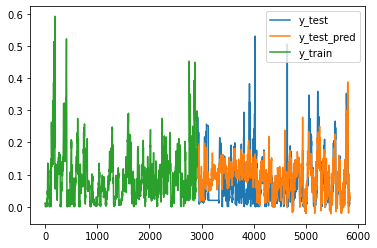

In [ ]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR1)) + len(ytrain1),ytest1)
plt.plot(np.arange(len(y_pred_MLR1)) + len(ytrain1), y_pred_MLR1)
plt.plot(ytrain1)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_test_pred', 'y_train'])


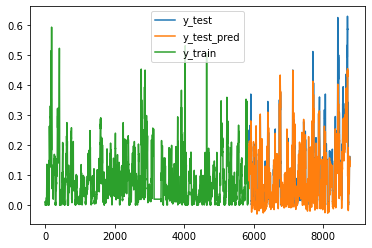

In [ ]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR2)) + len(ytrain2),ytest2)
plt.plot(np.arange(len(y_pred_MLR2)) + len(ytrain2), y_pred_MLR2)
plt.plot(ytrain2)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_test_pred', 'y_train'])

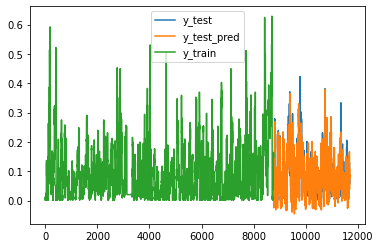

In [ ]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR3)) + len(ytrain3),ytest3)
plt.plot(np.arange(len(y_pred_MLR3)) + len(ytrain3), y_pred_MLR3)
plt.plot(ytrain3)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_test_pred', 'y_train'])


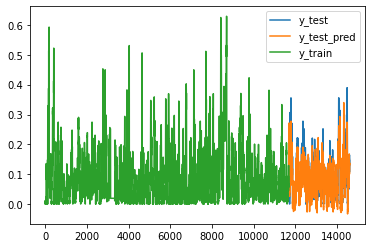

In [ ]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR4)) + len(ytrain4),ytest4)
plt.plot(np.arange(len(y_pred_MLR4)) + len(ytrain4), y_pred_MLR4)
plt.plot(ytrain4)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_test_pred', 'y_train'])


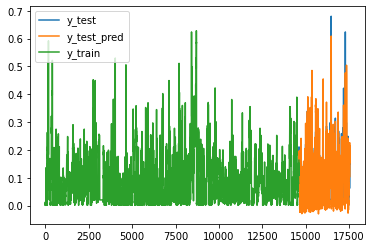

In [ ]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR5)) + len(ytrain5),ytest5)
plt.plot(np.arange(len(y_pred_MLR5)) + len(ytrain5), y_pred_MLR5)
plt.plot(ytrain5)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_test_pred', 'y_train'])


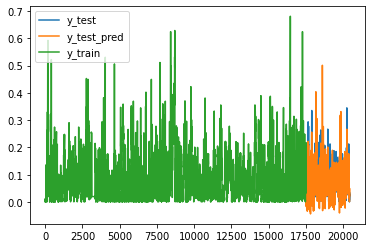

In [ ]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR6)) + len(ytrain6),ytest6)
plt.plot(np.arange(len(y_pred_MLR6)) + len(ytrain6), y_pred_MLR6)
plt.plot(ytrain6)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_test_pred', 'y_train'])


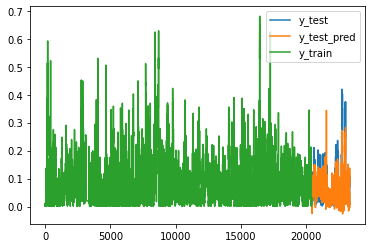

In [ ]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR7)) + len(ytrain7),ytest7)
plt.plot(np.arange(len(y_pred_MLR7)) + len(ytrain7), y_pred_MLR7)
plt.plot(ytrain7)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_test_pred', 'y_train'])

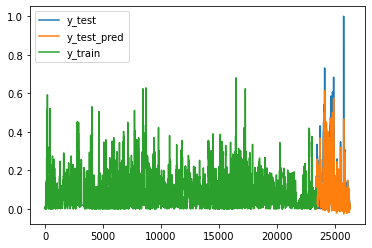

In [ ]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR8)) + len(ytrain8),ytest8)
plt.plot(np.arange(len(y_pred_MLR8)) + len(ytrain8), y_pred_MLR8)
plt.plot(ytrain8)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_test_pred', 'y_train'])

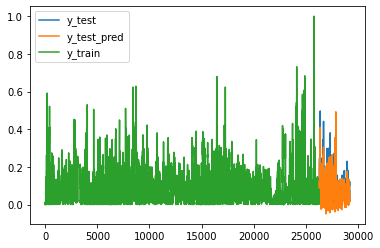

In [ ]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR9)) + len(ytrain9),ytest9)
plt.plot(np.arange(len(y_pred_MLR9)) + len(ytrain9), y_pred_MLR9)
plt.plot(ytrain9)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_test_pred', 'y_train'])

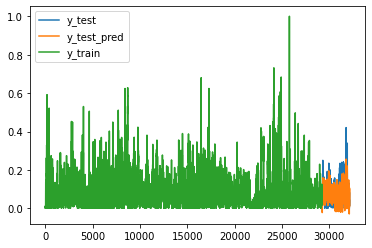

In [ ]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR10)) + len(ytrain10),ytest10)
plt.plot(np.arange(len(y_pred_MLR10)) + len(ytrain10), y_pred_MLR10)
plt.plot(ytrain10)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_test_pred', 'y_train'])

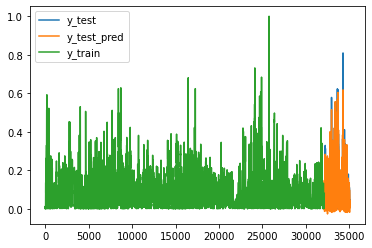

In [ ]:
#plot the predicted values
plt.plot(np.arange(len(y_pred_MLR11)) + len(ytrain11),ytest11)
plt.plot(np.arange(len(y_pred_MLR11)) + len(ytrain11), y_pred_MLR11)
plt.plot(ytrain11)
# you seemed to mess up the labels
plt.legend(['y_test', 'y_test_pred', 'y_train'])